In [5]:
from keras.datasets import imdb
from keras.preprocessing import sequence
max_features = 10000
maxlen = 500
batch_size = 32
print('데이터 로딩...')
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train 시퀀스')
print(len(input_test), 'test 시퀀스')
print('시퀀스 패딩 (samples x time)')
input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)
print('input_train 크기', input_train.shape)
print('input_test 크기', input_test.shape)

Using TensorFlow backend.
데이터 로딩...
17465344/17464789 [==============================] - 7s 0us/step
25000 train 시퀀스
25000 test 시퀀스
시퀀스 패딩 (samples x time)
input_train 크기 (25000, 500)
input_test 크기 (25000, 500)


In [6]:
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(input_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 19s 960us/step - loss: 0.6226 - acc: 0.6332 - val_loss: 0.4535 - val_acc: 0.7942
Epoch 2/10
20000/20000 [==============================] - 19s 936us/step - loss: 0.3766 - acc: 0.8383 - val_loss: 0.4538 - val_acc: 0.7856
Epoch 3/10
20000/20000 [==============================] - 19s 927us/step - loss: 0.2837 - acc: 0.8860 - val_loss: 0.3544 - val_acc: 0.8582
Epoch 4/10
20000/20000 [==============================] - 19s 940us/step - loss: 0.2254 - acc: 0.9127 - val_loss: 0.3437 - val_acc: 0.8606
Epoch 5/10
20000/20000 [==============================] - 19s 960us/step - loss: 0.1698 - acc: 0.9394 - val_loss: 0.3669 - val_acc: 0.8574
Epoch 6/10
20000/20000 [==============================] - 20s 996us/step - loss: 0.1250 - acc: 0.9573 - val_loss: 0.4165 - val_acc: 0.8460
Epoch 7/10
20000/20000

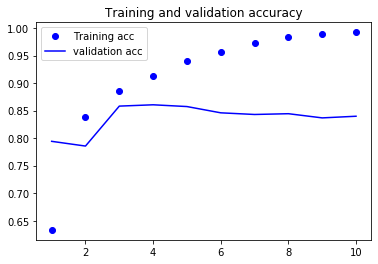

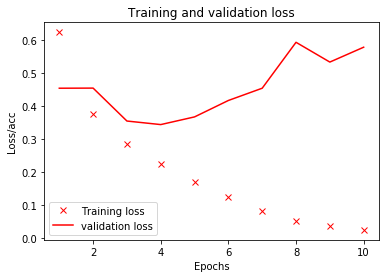

In [8]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()  # 2개의 그래프로 분리

plt.plot(epochs, loss, 'rx', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.xlabel('Epochs')
plt.ylabel('Loss/acc')
plt.legend()
plt.show()

In [9]:
test_mae_score, test_mae_score = model.evaluate(input_test, y_test)
print(test_mae_score)

25000/25000 [==============================] - 17s 675us/step
0.8338800072669983
